<a href="https://colab.research.google.com/github/AARATHIPRADEEP/Machine-Learning-Algorithms/blob/main/Position_Salaries_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [103]:
df=pd.read_csv('/content/drive/MyDrive/Dataset1/Position_Salaries (1).csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


PRE-PROCESSING


In [104]:
df.isna().sum()


Position    0
Level       0
Salary      0
dtype: int64

In [105]:
df.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [106]:
X=df.iloc[:,1:-1]
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [107]:
y=df.iloc[:,-1]
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

SIMPLE LINEAR REGRESSION

In [108]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [109]:
y_pred=lr.predict(X)
y_pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [110]:
from sklearn.metrics import r2_score

print('r2_score=',r2_score(y,y_pred))

r2_score= 0.6690412331929895


BEST FIT LINE


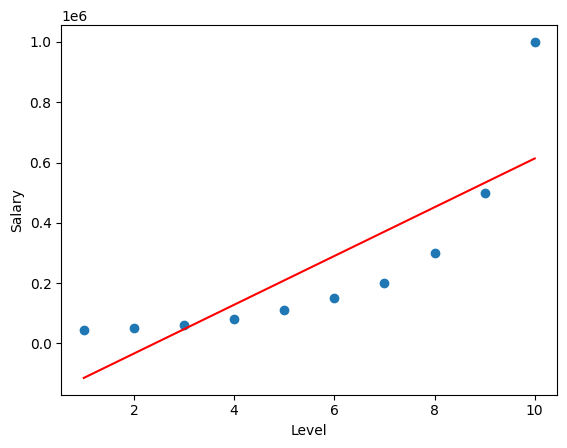

In [111]:
plt.scatter(X,y)
plt.plot(X,y_pred,c='red')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

POLYNOMIAL REGRESSION


In [112]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=10)
x_poly=poly.fit_transform(X)
x_poly

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01, 1.28000000e+02,
        2.56000000e+02, 5.12000000e+02, 1.02400000e+03],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01, 2.43000000e+02, 7.29000000e+02, 2.18700000e+03,
        6.56100000e+03, 1.96830000e+04, 5.90490000e+04],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02, 1.02400000e+03, 4.09600000e+03, 1.63840000e+04,
        6.55360000e+04, 2.62144000e+05, 1.04857600e+06],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, 1.25000000e+02,
        6.25000000e+02, 3.12500000e+03, 1.56250000e+04, 7.81250000e+04,
        3.90625000e+05, 1.95312500e+06, 9.76562500e+

In [113]:
lr_poly=LinearRegression()
lr_poly.fit(x_poly,y)
y_poly=lr_poly.predict(x_poly)
y_poly

array([ 44999.99995407,  50000.00037325,  60000.00018406,  80000.00034204,
       110000.00015661, 150000.00021127, 200000.00009203, 300000.00013876,
       499999.99944568, 999999.99909949])

In [114]:
print(r2_score(y,y_poly))

1.0


BEST FIT LINE

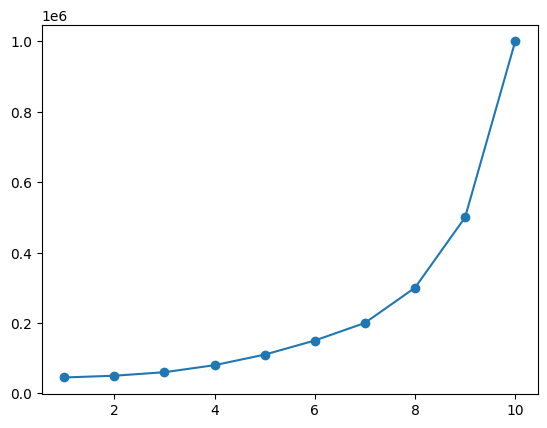

In [115]:
plt.scatter(X,y)
plt.plot(X,y_poly)
plt.show()